<ipython-input-3-3cbf2ceabc5f>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[i, i] = np.exp(-((test_point - xi) ** 2) / (2 * tau ** 2))


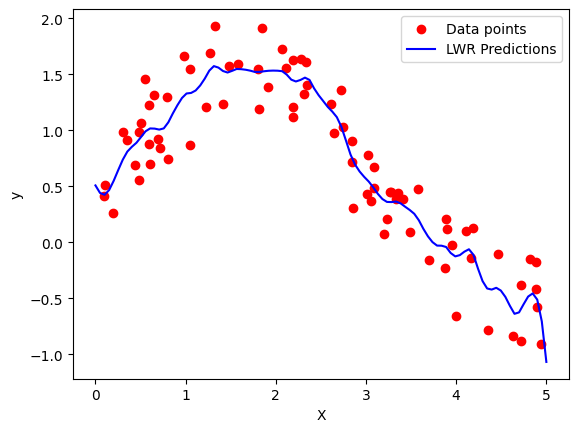

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (sine wave with noise)
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.rand(80)

# Locally Weighted Regression function
def locally_weighted_regression(test_point, X, y, tau):
    m, n = X.shape
    weights = np.zeros((m, m))

    # Compute the weights matrix
    for i in range(m):
        xi = X[i]
        weights[i, i] = np.exp(-((test_point - xi) ** 2) / (2 * tau ** 2))

    # Augment the X matrix to include the bias term (intercept)
    X_aug = np.hstack((np.ones((m, 1)), X))

    # Compute theta using the weighted least squares
    theta = np.linalg.pinv(X_aug.T @ (weights @ X_aug)) @ (X_aug.T @ (weights @ y))

    # Return prediction for the test point (adding the bias term)
    return np.array([1, test_point]) @ theta

# Predict for a set of test points
tau = 0.1  # Bandwidth parameter
X_test = np.linspace(0, 5, 100)
y_pred = [locally_weighted_regression(test_point, X, y, tau) for test_point in X_test]

# Plot the data and predictions
plt.scatter(X, y, c='r', label='Data points')
plt.plot(X_test, y_pred, c='b', label='LWR Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
